In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import math



In [ ]:
df = pd.read_csv('loan_data.csv')
df.head(5)

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


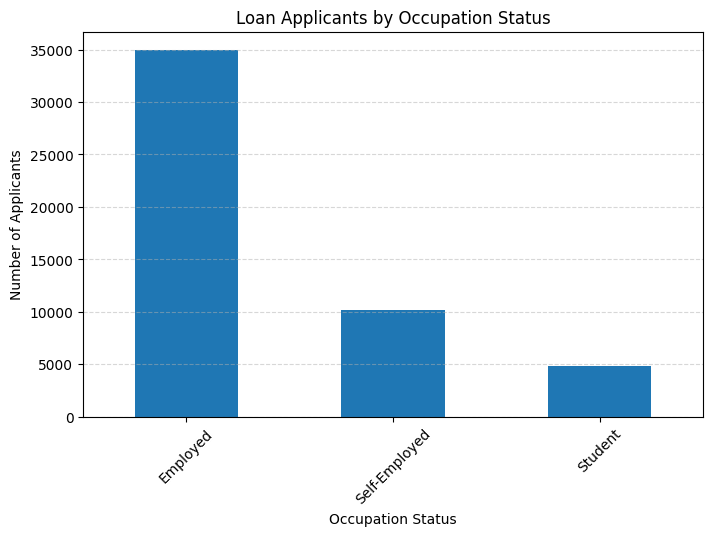

In [ ]:

occupation_counts = df["occupation_status"].value_counts()

plt.figure(figsize=(8, 5))
occupation_counts.plot(kind="bar")
plt.title("Loan Applicants by Occupation Status")
plt.xlabel("Occupation Status")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


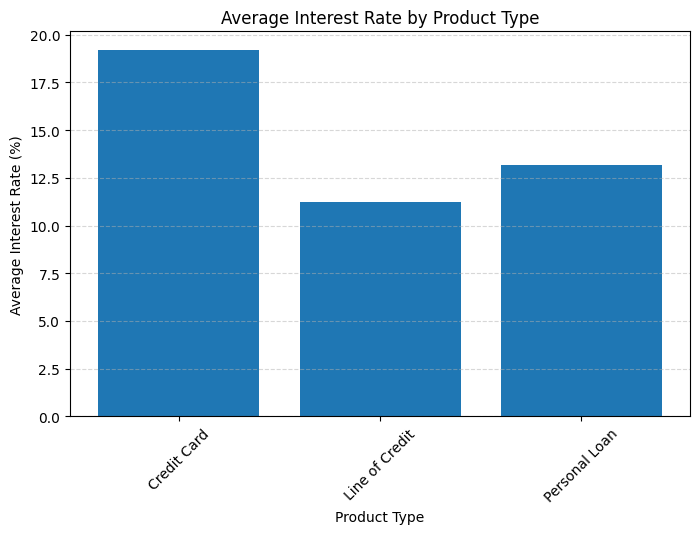

In [ ]:
avg_interest = df.groupby("product_type")["interest_rate"].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(avg_interest["product_type"], avg_interest["interest_rate"])
plt.title("Average Interest Rate by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Interest Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


          loan_intent  interest_rate
0            Business      15.448578
1  Debt Consolidation      15.481668
2           Education      15.538823
3    Home Improvement      15.478002
4             Medical      15.501919
5            Personal      15.512848


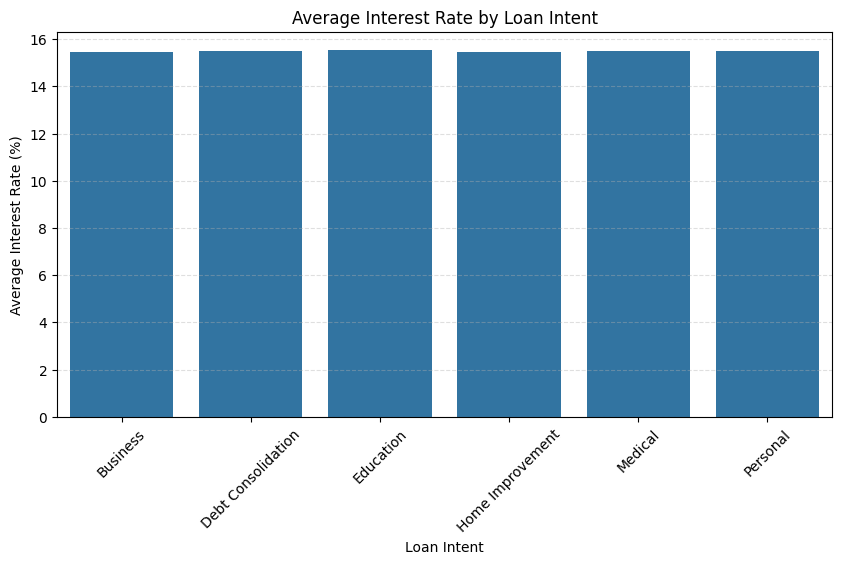

In [ ]:
interest_intent = df.groupby("loan_intent")["interest_rate"].mean().reset_index()
print(interest_intent)
plt.figure(figsize=(10,5))
sns.barplot(data=interest_intent, x="loan_intent", y="interest_rate")
plt.title("Average Interest Rate by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Average Interest Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


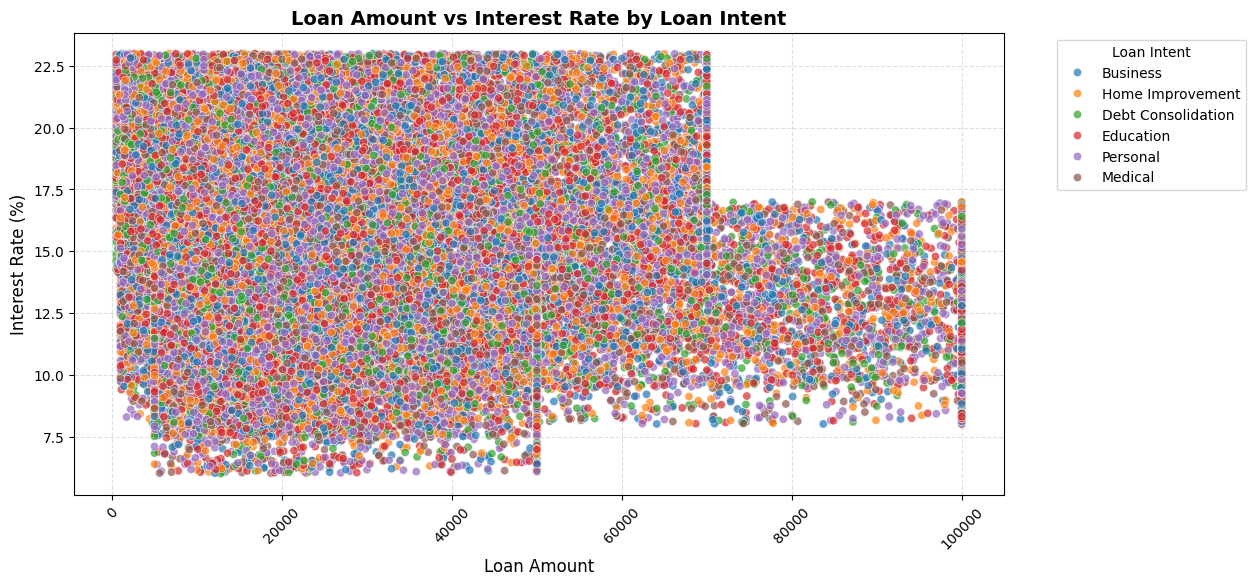

In [ ]:

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="loan_amount",
    y="interest_rate",
    hue="loan_intent",
    palette="tab10",
    alpha=0.7
)

plt.title("Loan Amount vs Interest Rate by Loan Intent", fontsize=14, fontweight="bold")
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Loan Intent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'years_employed'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'credit_history_years'}>,
        <Axes: title={'center': 'savings_assets'}>,
        <Axes: title={'center': 'current_debt'}>,
        <Axes: title={'center': 'defaults_on_file'}>],
       [<Axes: title={'center': 'delinquencies_last_2yrs'}>,
        <Axes: title={'center': 'derogatory_marks'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'interest_rate'}>],
       [<Axes: title={'center': 'debt_to_income_ratio'}>,
        <Axes: title={'center': 'loan_to_income_ratio'}>,
        <Axes: title={'center': 'payment_to_income_ratio'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

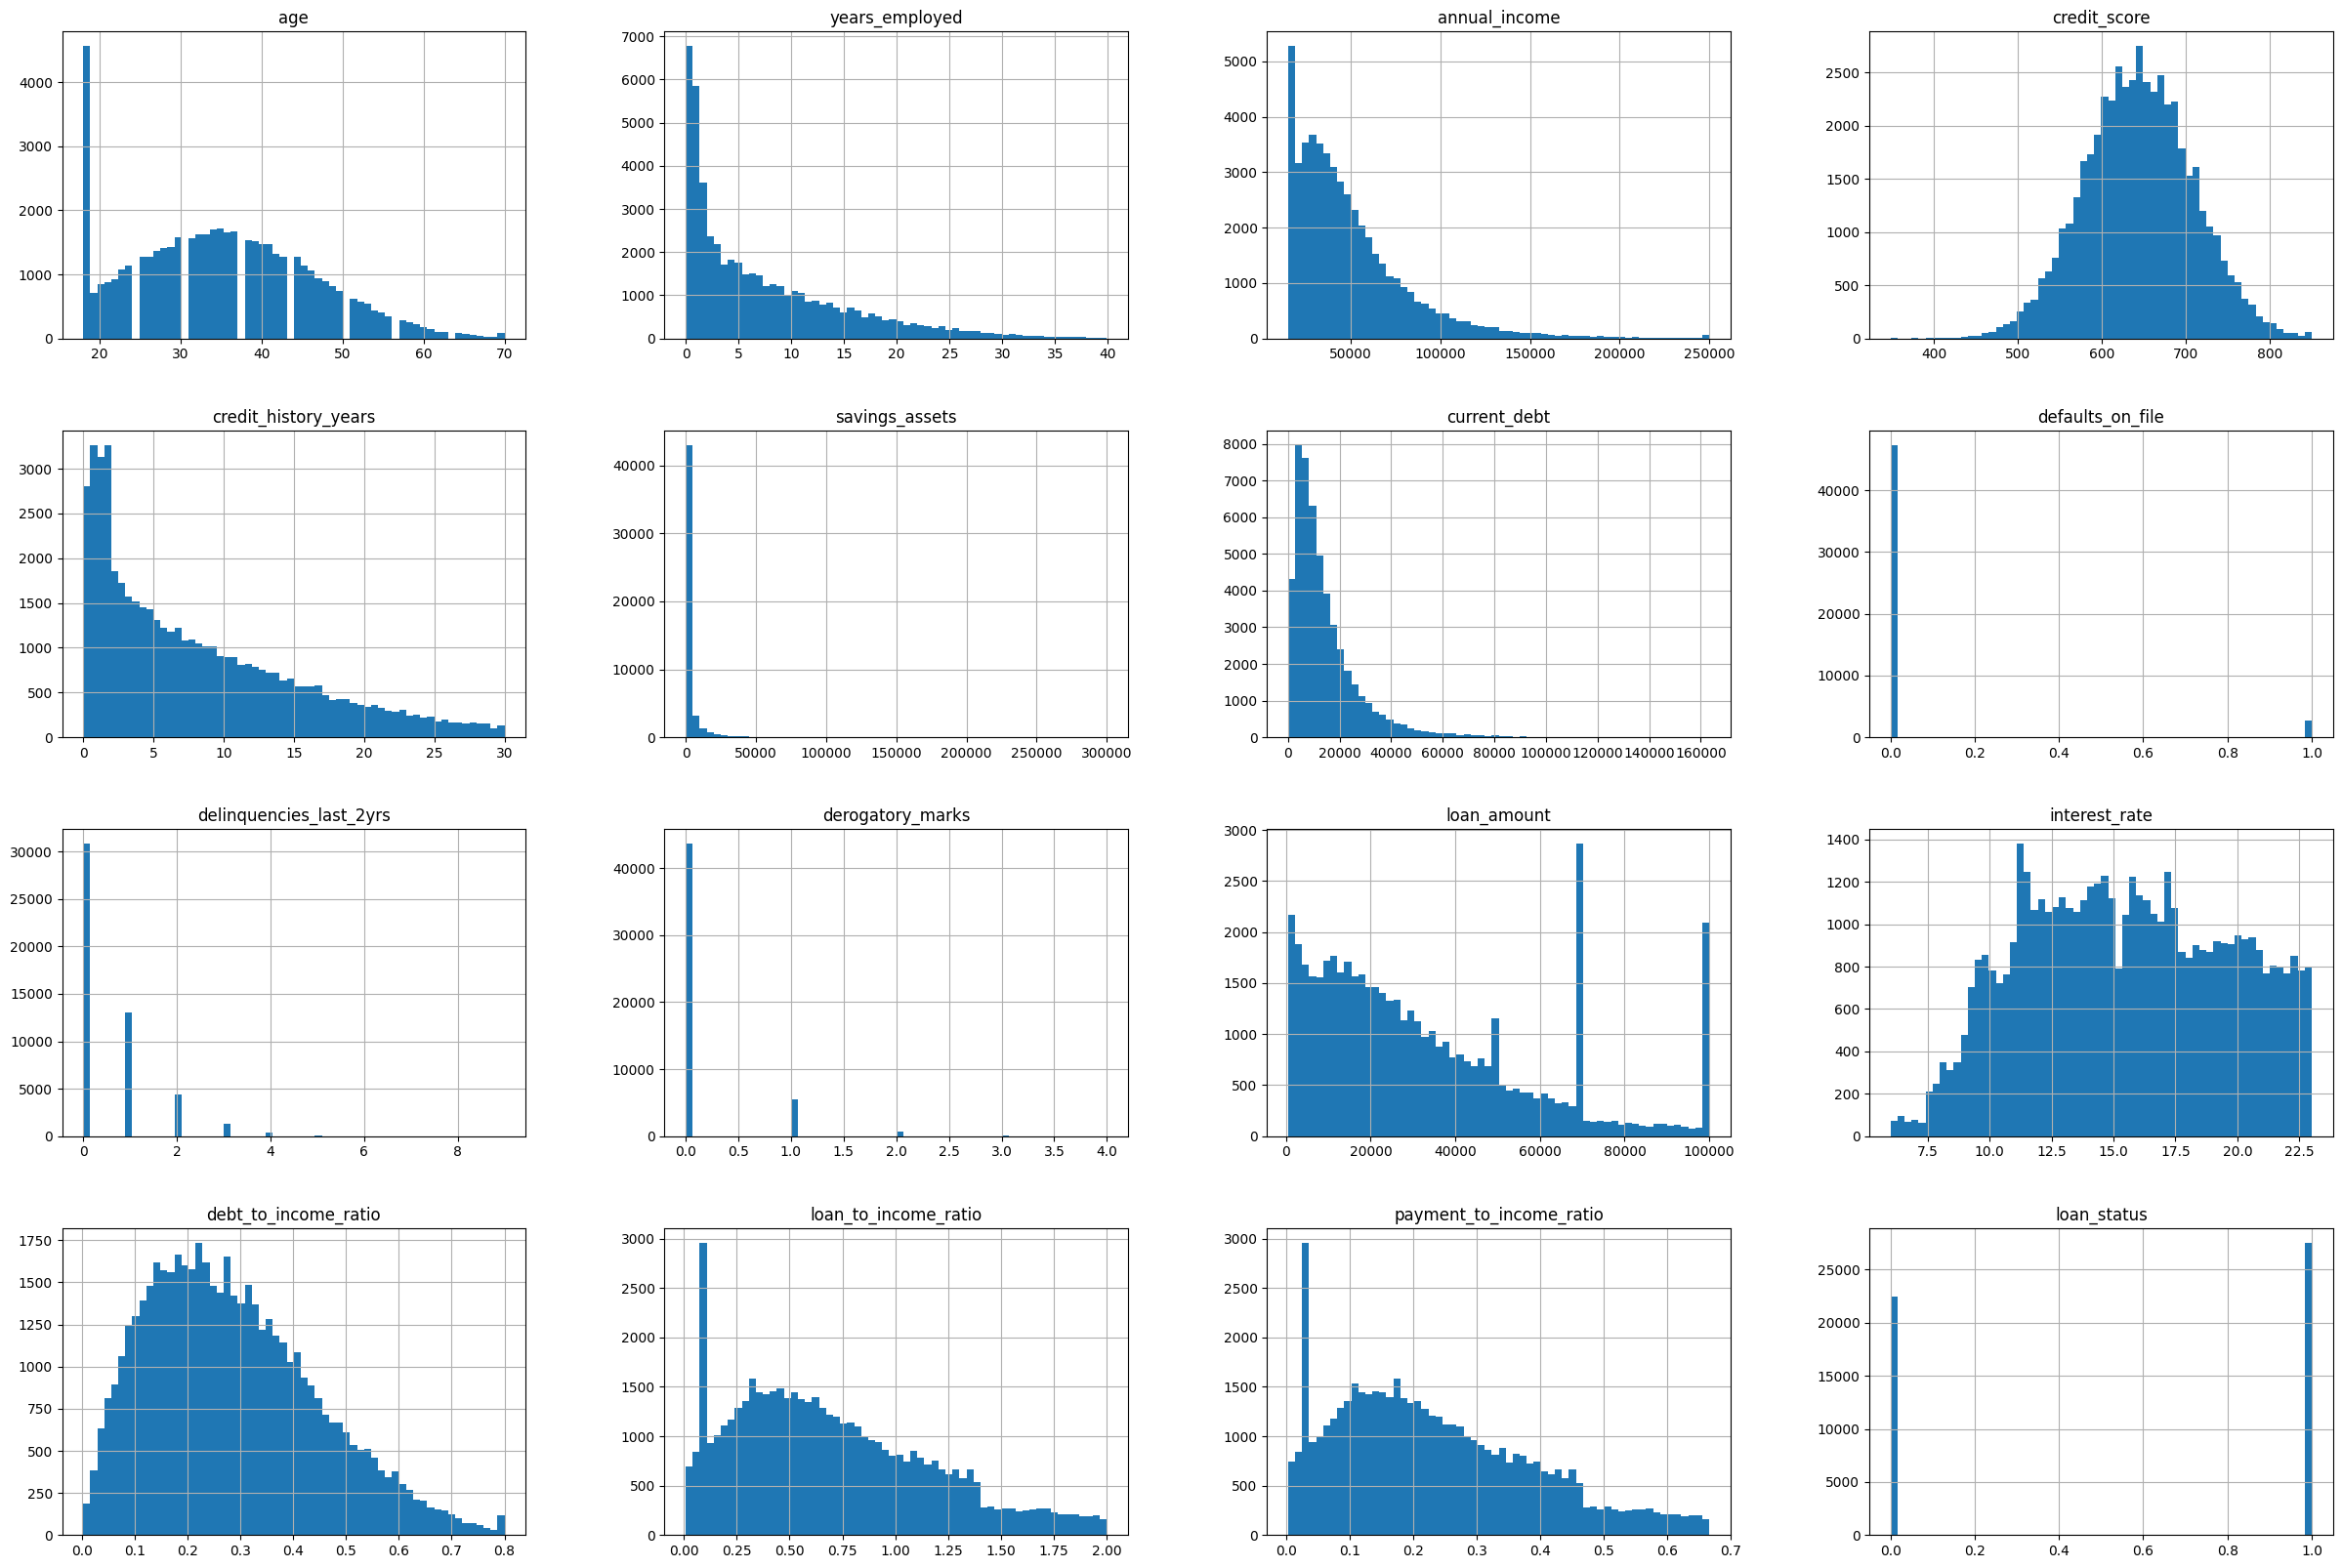

In [ ]:
df.hist(bins=60,figsize=(30,20))


<Axes: >

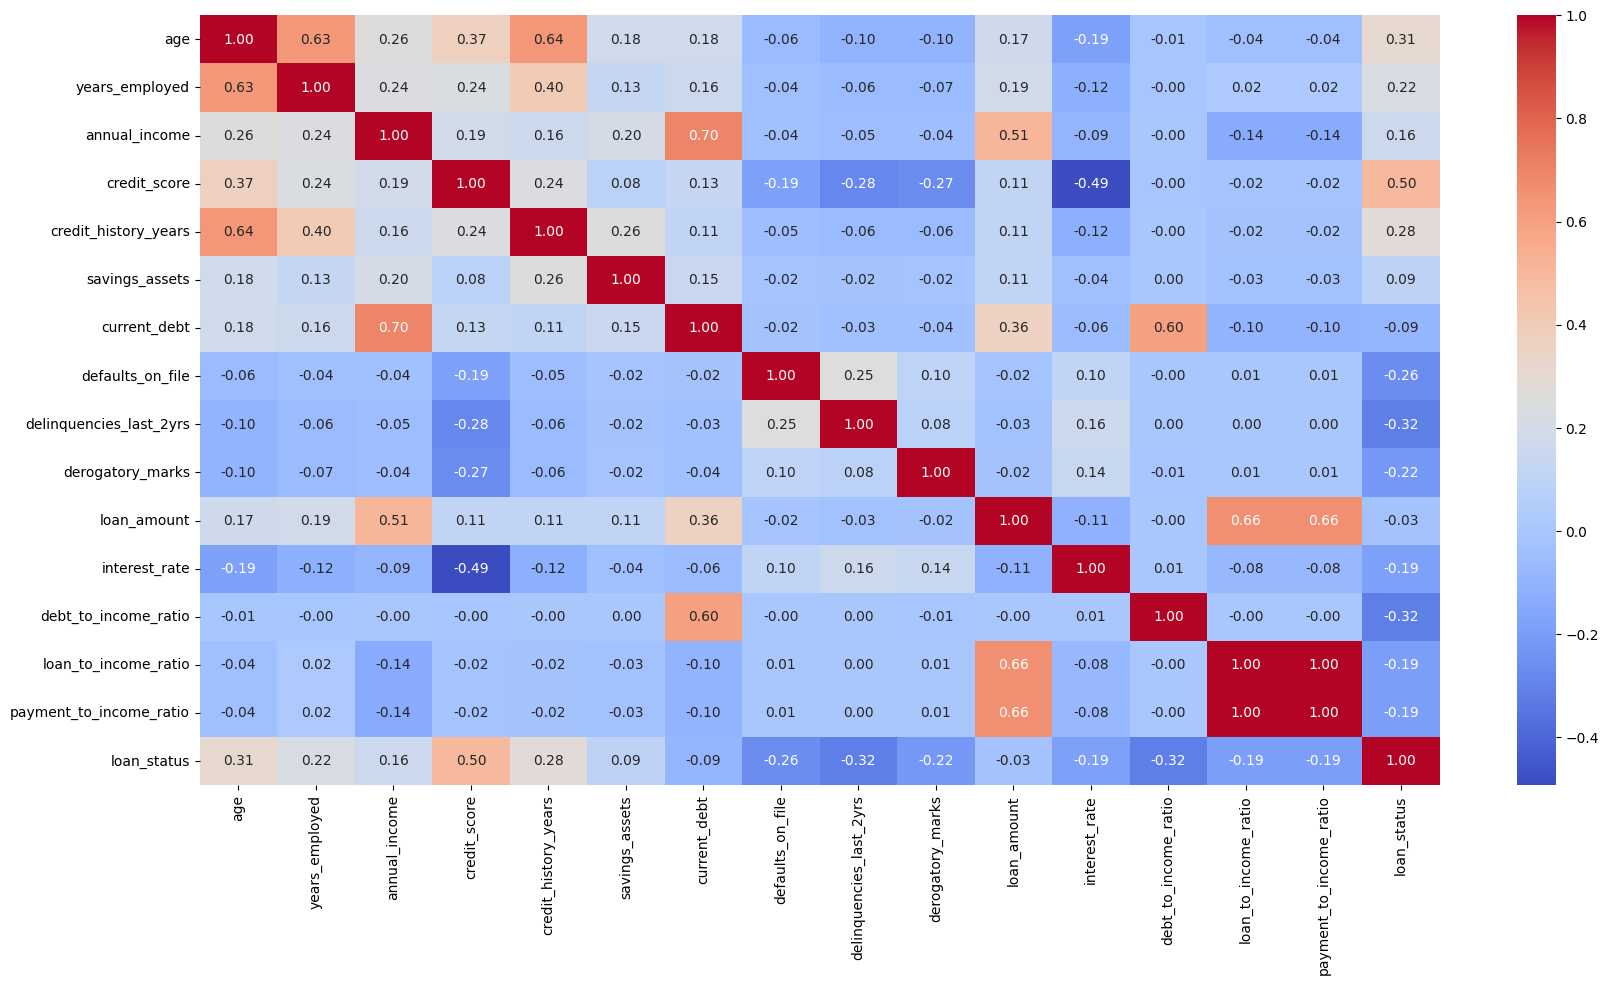

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
)


FEATURE TYPE SUMMARY

 Numerical features (15):
   1. age
   2. years_employed
   3. annual_income
   4. credit_score
   5. credit_history_years
   6. savings_assets
   7. current_debt
   8. defaults_on_file
   9. delinquencies_last_2yrs
   10. derogatory_marks
   11. loan_amount
   12. interest_rate
   13. debt_to_income_ratio
   14. loan_to_income_ratio
   15. payment_to_income_ratio

 Categorical features (3):
   1. occupation_status
   2. product_type
   3. loan_intent

 Total predictive features: 18
NUMERICAL FEATURES - STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max,missing,skewness,kurtosis
age,50000.000000,34.957060,11.118603,18.000000,26.000000,35.000000,43.000000,70.000000,0,0.335860,-0.436336
years_employed,50000.000000,7.454868,7.612097,0.000000,1.300000,4.900000,11.400000,39.900000,0,1.293613,1.262256
annual_income,50000.000000,50062.892040,32630.501014,15000.000000,27280.500000,41607.500000,62723.250000,250000.000000,0,1.887869,5.227919
credit_score,50000.000000,643.614820,64.731518,348.000000,600.000000,643.000000,687.000000,850.000000,0,0.012996,-0.043807
credit_history_years,50000.000000,8.168274,7.207552,0.000000,2.000000,6.100000,12.600000,30.000000,0,0.953755,0.075126
savings_assets,50000.000000,3595.619400,13232.399398,0.000000,130.000000,568.000000,2271.000000,300000.000000,0,12.054946,203.389514
current_debt,50000.000000,14290.442220,13243.757493,60.000000,5581.000000,10385.000000,18449.250000,163344.000000,0,2.437837,9.258902
defaults_on_file,50000.000000,0.053480,0.224991,0.000000,0.000000,0.000000,0.000000,1.000000,0,3.969386,13.756576
delinquencies_last_2yrs,50000.000000,0.554640,0.845050,0.000000,0.000000,0.000000,1.000000,9.000000,0,1.816944,4.091400
derogatory_marks,50000.000000,0.147640,0.412996,0.000000,0.000000,0.000000,0.000000,4.000000,0,3.117547,11.159749


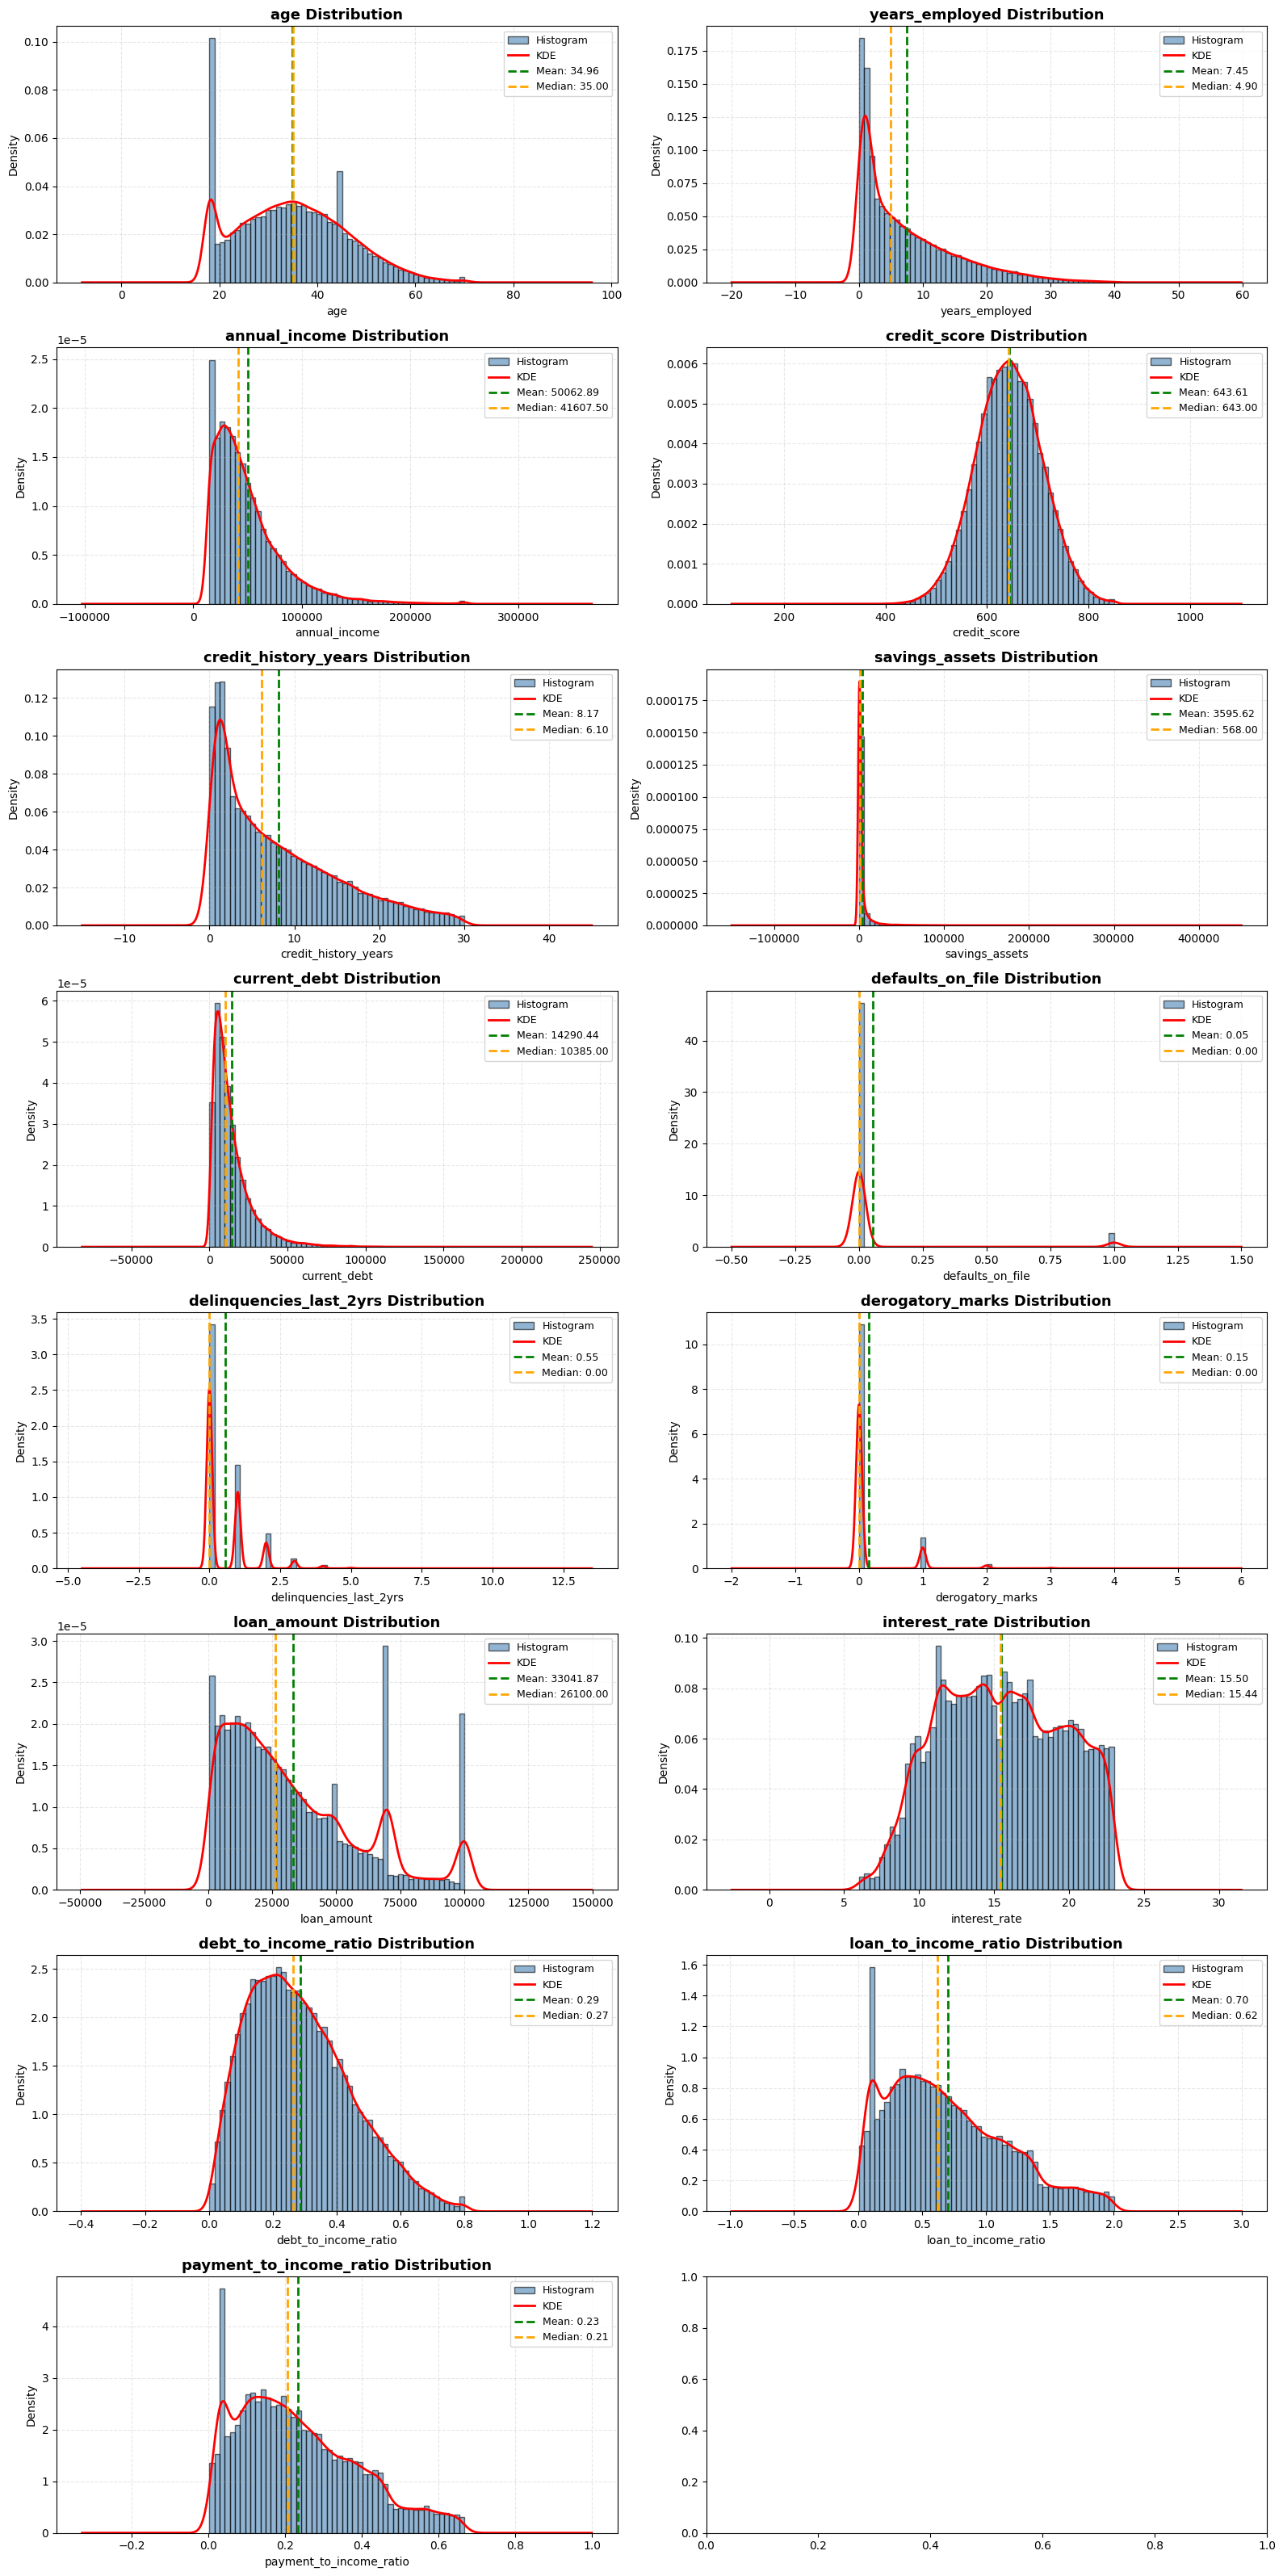

In [ ]:
categorical_cols = [col for col in df.columns.drop('customer_id') if df[col].dtype == 'O']
numerical_cols = [col for col in df.columns.drop('loan_status') if df[col].dtype != 'O']
print("FEATURE TYPE SUMMARY")
print("="*80)
print(f"\n Numerical features ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"   {i}. {col}")

print(f"\n Categorical features ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"   {i}. {col}")

print(f"\n Total predictive features: {len(numerical_cols) + len(categorical_cols)}")
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("="*80)

numerical_stats = df[numerical_cols].describe().T
numerical_stats['missing'] = df[numerical_cols].isnull().sum().values
numerical_stats['skewness'] = df[numerical_cols].skew().values
numerical_stats['kurtosis'] = df[numerical_cols].kurtosis().values

display(numerical_stats.style.background_gradient(cmap='coolwarm', subset=['mean', 'std', 'skewness', 'kurtosis']))
num_plots = len(numerical_cols)
rows = math.ceil(num_plots / 2)

fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, alpha=0.6, color='steelblue',
                   edgecolor='black', density=True, label='Histogram')

    df[col].plot(kind='kde', ax=axes[idx], color='red', linewidth=2, label='KDE')

    axes[idx].set_title(f'{col} Distribution', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].grid(alpha=0.3, linestyle='--')

    # Stats
    mean_val = df[col].mean()
    median_val = df[col].median()

    axes[idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.savefig("Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Categorical features summary
print("CATEGORICAL FEATURES - DETAILED ANALYSIS")
print("="*80)

for col in categorical_cols:
    print(f"Feature: {col.upper()}")
    print(f"{'='*80}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most common: {df[col].mode()[0]}")
    print(f"\nValue Counts:")

    value_counts_df = pd.DataFrame({
        'Value': df[col].value_counts().index,
        'Count': df[col].value_counts().values,
        'Percentage': (df[col].value_counts(normalize=True) * 100).values
    })
    display(value_counts_df.head(10).style.background_gradient(cmap='Blues', subset=['Count', 'Percentage']))

CATEGORICAL FEATURES - DETAILED ANALYSIS
Feature: OCCUPATION_STATUS
Unique values: 3
Most common: Employed

Value Counts:


,Value,Count,Percentage
0,Employed,34971,69.942000
1,Self-Employed,10179,20.358000
2,Student,4850,9.700000


Feature: PRODUCT_TYPE
Unique values: 3
Most common: Credit Card

Value Counts:


,Value,Count,Percentage
0,Credit Card,22455,44.910000
1,Personal Loan,17523,35.046000
2,Line of Credit,10022,20.044000


Feature: LOAN_INTENT
Unique values: 6
Most common: Personal

Value Counts:


,Value,Count,Percentage
0,Personal,12429,24.858000
1,Education,10134,20.268000
2,Medical,7598,15.196000
3,Business,7469,14.938000
4,Home Improvement,7453,14.906000
5,Debt Consolidation,4917,9.834000
